# Cars4U

## Problem definition
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

## Objective
1. To explore and visualize the dataset,
2. build a linear regression model to predict the prices of used cars, 
3. generate a set of insights and recommendations that will help the business.



## Data Information
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below

**Data Dictionary**
- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
- Price: The price of the used car in INR Lakhs
 


# NECESSARY CODING

### 1.0 Import necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

### 1.1 Load the dataset
The dataset containing the different attributes of used cars sold in different locations is contained in the file titled "anime_data_raw.csv" in my particular directory.

In [2]:
# loading the dataset
my_dataset = pd.read_csv("used_cars_data.csv")

<IPython.core.display.Javascript object>

### 1.2 Check out the shape of the dataset

In [3]:
print(
    f"The dataset contains {my_dataset.shape[0]} rows and {my_dataset.shape[1]} columns."
)

The dataset contains 7253 rows and 14 columns.


<IPython.core.display.Javascript object>

# There are 3 steps in Data Preprocessing:

# STEP A :Data format checking:
- Data Dimensioning
- checking the Data types

### 1.3A Checking the length of the dataset ()

In [4]:
len(my_dataset)

7253

<IPython.core.display.Javascript object>

### 1.4A To view first 5 rows of the dataset

In [5]:
my_dataset.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


<IPython.core.display.Javascript object>

### 1.5A To view the last 5 rows of the dataset

In [6]:
my_dataset.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


<IPython.core.display.Javascript object>

### 1.6A To view 10 samples of the dataset

In [7]:
# let's view a sample of the data
my_dataset.sample(
    10, random_state=2
)  # setting the random_state will ensure we get the same results every time

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4584,4584,Tata Tigor 1.05 Revotorq XT,Kochi,2018,28973,Diesel,Manual,First,24.7 kmpl,1047 CC,69 bhp,5.0,NaN,6.64
6505,6505,Volkswagen Vento Diesel Highline,Chennai,2011,76041,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
3675,3675,Maruti Swift VDI,Ahmedabad,2012,65000,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,NaN,3.90
5654,5654,Hyundai i20 Magna Optional 1.2,Kochi,2014,42315,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.0,NaN,4.79
4297,4297,Toyota Camry 2.5 G,Mumbai,2014,68400,Petrol,Automatic,First,12.98 kmpl,2494 CC,178.4 bhp,5.0,NaN,13.50
2603,2603,Mercedes-Benz New C-Class 220 CDI AT,Jaipur,2010,74213,Diesel,Automatic,First,14.84 kmpl,2143 CC,170 bhp,5.0,NaN,11.50
4337,4337,Volkswagen Vento Petrol Highline AT,Kochi,2014,32283,Petrol,Automatic,Second,14.4 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.41
6625,6625,Maruti Swift VDI BSIV,Kolkata,2012,72000,Diesel,Manual,First,17.8 kmpl,1248 CC,NaN,5.0,NaN,NaN
2846,2846,Skoda Superb Elegance 1.8 TSI AT,Kochi,2011,73783,Petrol,Automatic,Second,13.7 kmpl,1798 CC,157.75 bhp,5.0,NaN,5.23
1237,1237,Audi Q3 2.0 TDI Quattro,Hyderabad,2013,60000,Diesel,Automatic,First,17.32 kmpl,1968 CC,184 bhp,5.0,NaN,21.00


<IPython.core.display.Javascript object>

#### Observation

1. There are missing values.
2. There are two(2) transmission types.
3. There are two(2) ownership types.
4. There are different unit of mileage.
5. There are no list of values.


### 1.7A checking the names of the columns in the data

In [8]:
print(my_dataset.columns)

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


<IPython.core.display.Javascript object>

### 1.8A checking column datatypes and number of non-null values

In [9]:
my_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

#### Observations
1. Two(2) columns are of **float** type.
2. Three(3) columns are of **int** type 
3. Six(6) columns are of string (**object** type)
4. Dependent variable is Price. It is of **float** type.


# STEP B IN DATA PROCESSING-------Data Consistency:
- Checking for missing values.
- Checking for inconsistency.
- Checking for duplicate values.
- Checking for outliers.
- Checking data distribution and skewness

### 1.9B creating a copy of the data so that original data remains unchanged


In [10]:
df = my_dataset.copy()

<IPython.core.display.Javascript object>

In [11]:
df.drop(["New_Price"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

### 1.10B checking if the dataset has duplicate values


In [12]:
# checking for duplicate values in the data
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

### 1.11B checking for missing values in the data.

In [13]:
df.isnull().sum()
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


<IPython.core.display.Javascript object>

In [14]:
df.drop(["S.No."], axis=1, inplace=True)

<IPython.core.display.Javascript object>

### 1.12B Statistical Summary or Descriptive Statistics

In [15]:
df.describe(include="all").T  # quick summary of numeric features

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7078,385,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

#### Observations.
1. The table above shows that the **Price** for a used car varies from 0.44 to 160.
2. **Mahindra XUV500 W8 2WD** is the most common name of car with a frequency of 55.
3. **Diesel** is the most common fuel type in this dataset, with a frequency of 3852.
4. **Mumbai** is the most common Location in which the car is being sold or is available for purchase (cities).
5. Majority of the cars are controlled **manually**.

##### The summary in the table above shows that there are many missing values in the columns. Hence, some columns need to be preprocessed and cleaned before the data can be analysed.

### 1.13B Dropping the missing values from the dependent or target variable.
 The **Price** column is the dependent or target variable. Hence, the code below will drops the missing values in this column.

In [16]:
df.dropna(subset=["Price"], inplace=True)


<IPython.core.display.Javascript object>

#### Observations.
1. All the missing values in the **Price** column has been dropped.

### 1.14B  checking missing values in rest of the data

In [17]:
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations
* There are missing values in 4 columns or features:
1. Mileage.
2. Engine.
3. Power.
4. Seats.


### 1.15B filtering non-numeric columns

In [18]:
cat_columns = df.select_dtypes(exclude=np.number).columns
cat_columns

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power'],
      dtype='object')

<IPython.core.display.Javascript object>

In [19]:
# we will skip the Name, Mileage, Power and New_Price columns because they will have a lot of unique values
cat_col = ["Location", "Fuel_Type", "Transmission", "Owner_Type", "Engine"]

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64
--------------------------------------------------
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64
--------------------------------------------------
Manual       4299
Automatic    1720
Name: Transmission, dtype: int64
--------------------------------------------------
First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64
--------------------------------------------------
1197 CC    606
1248 CC    512
1498 CC    304
998 CC     259
2179 CC    240
1497 CC    229
1198 CC    227
1968 CC    216
1995 CC    183
1461 CC    152
2143 CC    149
1582 CC    145
1199 CC    143
1598 CC    141
1396 CC    139
796 CC     129
2494 CC    121
1086 CC

<IPython.core.display.Javascript object>

#### Observations.
1.  Most of the cars are being sold or are available for purchase in Mumbai.
2. Most of the cars make use of Diesel.
3. Most of the cars have manual transmission.
4. Most of the cars are first owned.
5. Majority of the cars have displacement volume of the engine as 1197 CC.

### 1.16B Checking missing values in rest of the data

In [20]:
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

<IPython.core.display.Javascript object>

#### Analyzing the columns that have missing values
There are five columns with missing values:
1. Mileage.
2. Engine.
3. Power.
4. Seat.

#### plan
1. Handling the missing values in the **[Seats]** column.
2. I will convert the Power column from **String** to **Numerical** type. 
3. The decision to drop these missing values or impute them by a suitable value is subject to domain knowledge, and based on the steps taken to deal with them, the model performance will vary.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5876 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 611.3+ KB


<IPython.core.display.Javascript object>

In [22]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


<IPython.core.display.Javascript object>

In [23]:
# Resetting the dataframe index
df.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

In [24]:
# checking missing values in rest of the data
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

<IPython.core.display.Javascript object>

###  Analyzing the missing values in the [Seat] column as shown in the table above. 

In [25]:
df[df.Seats.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN,3.60
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,40.88
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,NaN,1.70


<IPython.core.display.Javascript object>

In [26]:
df["Seats"].fillna(df.Seats.median(), inplace=True)
df.isnull().sum()


Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                  0
Price                  0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
1. The Power column has 107 missing values.
2. The New_Price column has 5158 missing values
3. Presently, all the missing values in the **[Seat]** column has been replaced with **median value**.

###  Analyzing the missing values in the [Power] column as shown in the table above. 

#### Now, i will check the number of unique values and the number of times they occur for the **Power** column.

In [27]:
df.Power.value_counts()

74 bhp        235
98.6 bhp      131
73.9 bhp      125
140 bhp       123
78.9 bhp      111
             ... 
76.9 bhp        1
201 bhp         1
199.3 bhp       1
95 bhp          1
181.04 bhp      1
Name: Power, Length: 371, dtype: int64

<IPython.core.display.Javascript object>

In [28]:
# checking for missing values in the data.
df[df.Power.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,NaN,5.0,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,NaN,5.0,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,NaN,5.0,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,NaN,5.0,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,NaN,5.0,1.67
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,5.0,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,5.0,2.11
227,Maruti Swift VDI BSIV,Delhi,2013,47000,Diesel,Manual,First,17.8 kmpl,1248 CC,NaN,5.0,4.10
245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third,17.0 kmpl,1086 CC,NaN,5.0,0.95
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,0.0 kmpl,1086 CC,NaN,5.0,1.75


<IPython.core.display.Javascript object>

In [29]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


<IPython.core.display.Javascript object>

In [30]:
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                  0
Price                  0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations.
1. The **[Power]** column had missing values. A drop in the missing values of **[Power]** column will affect the missing values in the **[Engine]** column. Therefore, there is a relationship between **[Power]**, and **[Engine]**.

2. So, i will replace the missing values with the **median** values instead of dropping them.

### Further Analyzes of the Power Column containing bhp.

There are some columns that represent The maximum power of the engine in bhp. The values all begin with `bhp`. First I want to detect which columns fit this pattern, and then I'll turn these into numerical variables. 

In [31]:
def power_to_num(Power):
    """In the Power column I'm replacing the terminal 'bhp' with
    the empty string and converting to a float. Non-strings are
    np.nans and are kept as np.nans."""
    if isinstance(Power, str):
        return float(Power.replace("bhp", ""))
    else:
        return np.nan


# I could just do this by copy-pasting one line and editing which column and
# which function I'm using for each one in turn. With only two columns
# that's not so bad, but it gets cumbersome quickly

df['Power'] = df['Power'].apply(power_to_num)
df


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.10,5.0,2.65


<IPython.core.display.Javascript object>

#### Observation.

1. I have converted the **[Power]** column from an ***object*** data type to Numerical type.


In [32]:
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                  0
Price                  0
dtype: int64

<IPython.core.display.Javascript object>

In [33]:
# I want to replace the entries that have missing value of Power, with the median as this is a difficult column to impute.
df["Power"].fillna(df.Power.median(), inplace=True)
df.isnull().sum()



Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                 0
Seats                 0
Price                 0
dtype: int64

<IPython.core.display.Javascript object>

In [34]:
df.describe()

,Year,Kilometers_Driven,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,112.883539,5.276790,9.479468
std,3.269742,9.126884e+04,53.283701,0.806346,11.187917
min,1998.000000,1.710000e+02,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,78.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,138.030000,5.000000,9.950000
max,2019.000000,6.500000e+06,560.000000,10.000000,160.000000


<IPython.core.display.Javascript object>

In [35]:
df.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.70,5.0,4.50


<IPython.core.display.Javascript object>

#### Observations.
1. The **[Power]** Column has been converted to a **Numerical** data type.
2. The **[Mileage]** and **[Engine]** columns needs to be converted to **[Numerical]** data type. 

### 1.17B Analyzing the **String**  data type in the [Engine] column as shown in the table above. 

In [36]:
df[df.Engine.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,97.7,5.0,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,97.7,5.0,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,97.7,5.0,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,97.7,5.0,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,97.7,5.0,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,97.7,5.0,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,97.7,5.0,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,97.7,5.0,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,97.7,5.0,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,97.7,5.0,1.93


<IPython.core.display.Javascript object>

#### Observations.
1. The table above shows all the entries with no Engine size in CC( missing values).
2. A closer look reveals at the corresponding **[Power]** for the missing **[Engine]** values reveals that there is a relationship between **[Engine]** and **[Power]. 
3. The **[Power]** values are the median.

### Converting the [Engine] column to a Numerical data type

In [37]:
def engine_to_num(Engine):
    """In the engine column I'm replacing the terminal 'CC' with
    the empty string and converting to a float. Non-strings are
    np.nans and are kept as np.nans."""
    if isinstance(Engine, str):
        return float(Engine.replace("CC", ""))
    else:
        return np.nan


# I could just do this by copy-pasting one line and editing which column and
# which function I'm using for each one in turn. With only two columns
# that's not so bad, but it gets cumbersome quickly

df['Engine'] = df['Engine'].apply(engine_to_num)
df.head(3)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50


<IPython.core.display.Javascript object>

#### Observation.

1. I have converted the **[Engine]** column from an ***object*** data type to Numerical type.


In [38]:
# Checking the rest of the data for missing values
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                 0
Seats                 0
Price                 0
dtype: int64

<IPython.core.display.Javascript object>

#### Observation.
1. The Engine column has 36 missing values.
2. So, i will replace these values with the median of the **[Engine]** column

In [39]:
# I want to replace the entries that have missing value of Engine, with the median as this is a difficult column to impute.
df["Engine"].fillna(df.Engine.median(), inplace=True)
df.isnull().sum()



Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

<IPython.core.display.Javascript object>

#### Observation.
1. The **[Engine]** column has no missing value.

In [40]:
df.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50


<IPython.core.display.Javascript object>

###  Analyzing the missing values in the [Mileage] column. 

In [41]:
# checking missing values in rest of the data
df[df.Mileage.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75


<IPython.core.display.Javascript object>

### Converting the [Mileage] column to a Numerical data type

In [42]:
kmkg = 0
kmpl = 0
for i in df.Mileage:
    if str(i).endswith("km/kg"):
        kmkg += 1
    elif str(i).endswith("kmpl"):
        kmpl += 1
print("The number of rows with Km/Kg : {} ".format(kmkg))
print("The number of rows with kmpl : {} ".format(kmpl))

The number of rows with Km/Kg : 66 
The number of rows with kmpl : 5951 


<IPython.core.display.Javascript object>

In [43]:
# this loop prints the names of the columns where there is
# at least one entry ending with the character 'km/kg' and 'kmpl'
mileage_cols = []
for colname in df.columns[
    df.dtypes == "object"
]:  # only need to consider string columns
    if (
        df[colname].str.endswith("km/kg", "kmpl").any()
    ):  # using `.str` so I can use an element-wise string method
        mileage_cols.append(colname)
print(mileage_cols)

['Mileage']


<IPython.core.display.Javascript object>

#### Observations.
1. In the **[Mileage]** column, there is at least one entry ending with the character 'km/kg'or 'kmpl' 

In [44]:
def mileage_to_num(Mileage_val):
    """This function takes in a string representing a salary in Euros
    and converts it to a number. For example, '€220K' becomes 220000.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(Mileage_val, str):  # checks if `income_val` is a string
        multiplier = 1  # handles K vs M salaries
        if Mileage_val.endswith("km/kg"):
            multiplier = 1.4
        elif Mileage_val.endswith("kmpl"):
            multiplier = 1
        return float(Mileage_val.replace("km/kg", "").replace("kmpl", "")) * multiplier
    else:  # this happens when the current income is np.nan
        return np.nan


for colname in mileage_cols:
    df[colname] = df[colname].apply(mileage_to_num)

df[mileage_cols].head(7)  # good to go!

,Mileage
0,37.24
1,19.67
2,18.20
3,20.77
4,15.20
5,29.54
6,23.08


<IPython.core.display.Javascript object>

#### Observation.

1. I have converted the **[Mileage]** column from an ***object*** data type to Numerical type.


In [45]:
# Checking the rest of the data for missing values
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

<IPython.core.display.Javascript object>

### I will fill the remaining missing values in **Mileage** column by column median.

In [1]:
# Resetting the dataframe index
df.reset_index(inplace=True, drop=True)

df["Mileage"].fillna(df.Mileage.median(), inplace=True)

df.isnull().sum()

NameError: name 'df' is not defined

#### Observations.
1. There are no missing values in the **[Mileage]** Column. 
2. I filled the missing values with the median of **[Mileage]**.

 # 1.18B Exploratory Data Analysis

#### UNIVARIANT ANALYSIS For the Numerical Variables

In [47]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### The Target Variable [Price]

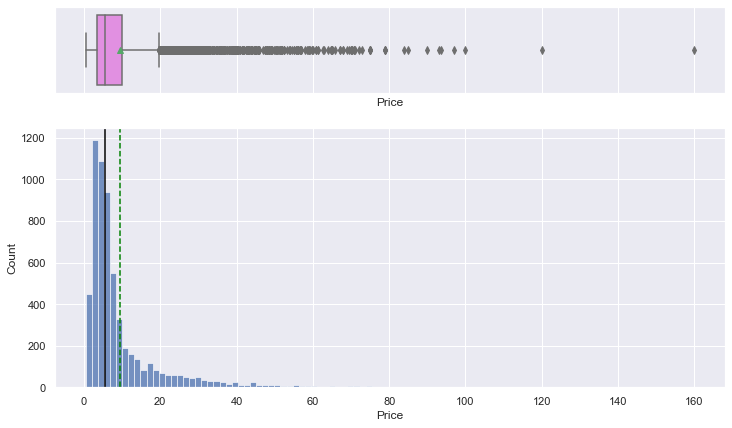

<IPython.core.display.Javascript object>

In [48]:
histogram_boxplot(df, "Price", bins=100)

#### Observation.
1. The Distribution of Old cars is right-skewed with a median Price of less than 10

### Outlier-[Price] column

In [49]:
quartiles = np.quantile(df["Price"][df["Price"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_Price = df.loc[np.abs(df["Price"] - df["Price"].median()) > power_4iqr, "Price"]
outlier_Price

Q1 = 3.5, Q3 = 9.95, 4*IQR = 25.799999999999997


67       35.67
92       39.58
134      54.00
148      37.00
168      45.00
         ...  
5919    100.00
5921     36.00
5927     45.52
5946     48.00
6008     45.00
Name: Price, Length: 324, dtype: float64

<IPython.core.display.Javascript object>

###  [Seats]

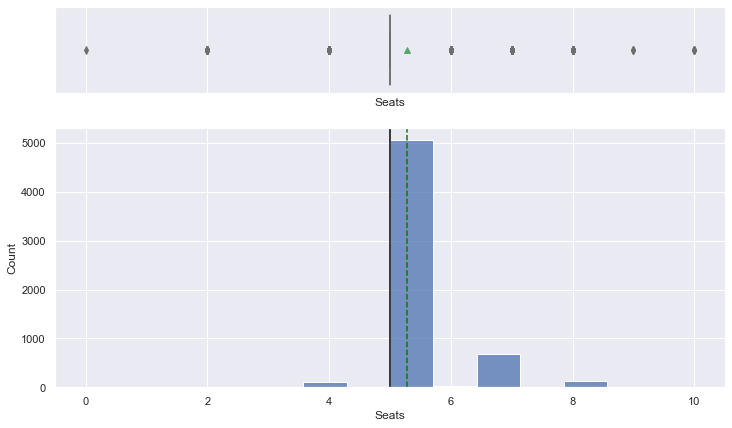

<IPython.core.display.Javascript object>

In [50]:
histogram_boxplot(df, "Seats")

### Outlier-[Seats] column

In [51]:
quartiles = np.quantile(df["Seats"][df["Seats"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_Seats = df.loc[np.abs(df["Seats"] - df["Seats"].median()) > power_4iqr, "Seats"]
outlier_Seats

Q1 = 5.0, Q3 = 5.0, 4*IQR = 0.0


3       7.0
7       8.0
15      7.0
29      7.0
32      7.0
       ... 
5982    7.0
5990    7.0
6008    4.0
6012    7.0
6016    8.0
Name: Seats, Length: 963, dtype: float64

<IPython.core.display.Javascript object>

###  [Power]

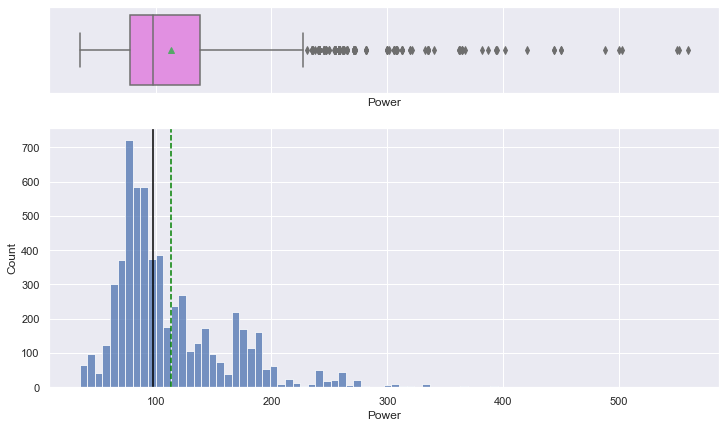

<IPython.core.display.Javascript object>

In [52]:
histogram_boxplot(df, "Power")

#### Observation.
1. The distribution is right-skewed, and most of the car engines have Power that is less than 100 bhp

### Outlier Treatment
#### [Power]

In [53]:
quartiles = np.quantile(df["Power"][df["Power"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_powers = df.loc[
    np.abs(df["Power"] - df["Power"].median()) > power_4iqr, "Power"
]
outlier_powers

Q1 = 78.0, Q3 = 138.03, 4*IQR = 240.12


70      500.00
134     362.07
148     444.00
152     362.90
418     367.00
589     364.90
1930    364.90
2095    362.07
2100    550.00
2978    394.30
3132    340.00
3341    402.00
4061    444.00
4342    364.90
4451    395.00
4627    450.00
4691    421.00
4722    387.30
4821    450.00
5088    503.00
5341    382.00
5521    552.00
5603    394.30
5781    560.00
5919    488.10
Name: Power, dtype: float64

<IPython.core.display.Javascript object>

###  [Engine]

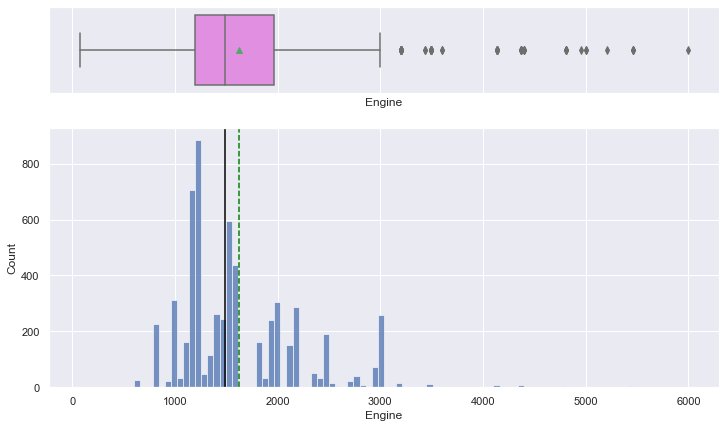

<IPython.core.display.Javascript object>

In [54]:
histogram_boxplot(df, "Engine", bins=100)

#### Observation.
1. The distribution is right-skewed with a median Engine size of less than 2000 CC

### Outlier-[Engine] column

In [55]:
quartiles = np.quantile(df["Engine"][df["Engine"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_Engine = df.loc[
    np.abs(df["Engine"] - df["Engine"].median()) > power_4iqr, "Engine"
]
outlier_Engine

Q1 = 1198.0, Q3 = 1969.0, 4*IQR = 3084.0


70      4806.0
152     5461.0
2100    4806.0
2978    4806.0
4451    4951.0
4691    5461.0
4722    5461.0
5088    5000.0
5521    5998.0
5603    4806.0
5781    5204.0
5919    5000.0
Name: Engine, dtype: float64

<IPython.core.display.Javascript object>

###  [Mileage]

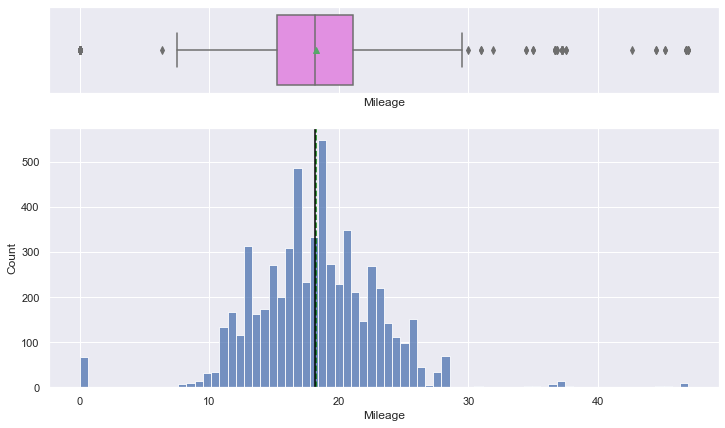

<IPython.core.display.Javascript object>

In [56]:
histogram_boxplot(df, "Mileage")

#### Observation.
1. The Mileages are close to normally distributed.

### Outlier-[Mileage] column

In [57]:
quartiles = np.quantile(df["Mileage"][df["Mileage"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_Mileage = df.loc[
    np.abs(df["Mileage"] - df["Mileage"].median()) > power_4iqr, "Mileage"
]
outlier_Mileage

Q1 = 15.26, Q3 = 21.1, 4*IQR = 23.360000000000007


1269    46.816
1332    46.956
2059    46.956
2371    46.956
2701    44.506
3119    45.164
3129    46.956
3553    46.816
3869    46.816
4141    46.956
4769    46.816
5178    44.506
5710    42.644
5935    45.164
Name: Mileage, dtype: float64

<IPython.core.display.Javascript object>

###  [Kilometers_Driven]

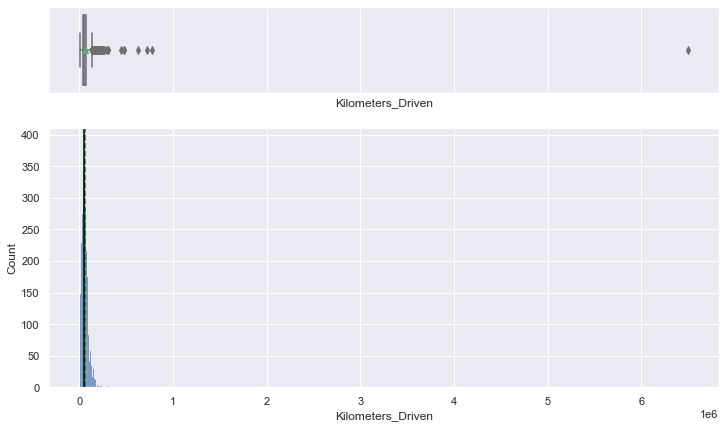

<IPython.core.display.Javascript object>

In [58]:
histogram_boxplot(df, "Kilometers_Driven")

#### Observation.
1. The distribution is heavily right-skewed

###  [Year]

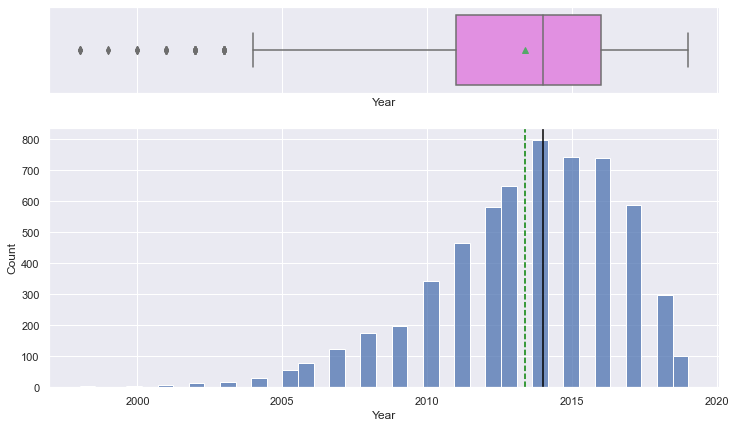

<IPython.core.display.Javascript object>

In [59]:
histogram_boxplot(df, "Year")

#### Observation.
1. The distribution of Year is left-skewed with a median Year of less than 2015.

## UNIVARIANT ANALYSIS For the Categorical Variables

In [60]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

## Fuel_Type

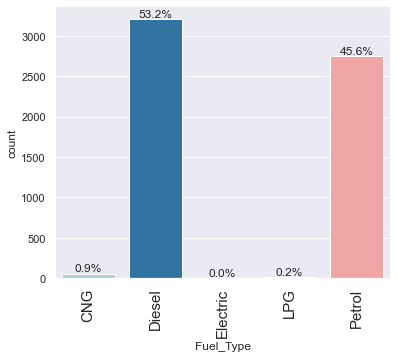

<IPython.core.display.Javascript object>

In [61]:
labeled_barplot(df, "Fuel_Type", perc=True)

#### Observations.
1. Majority of the cars use Diesel as fuel.
2. Very few cars use CNG, Electric or LPG as fuel.

## Transmission

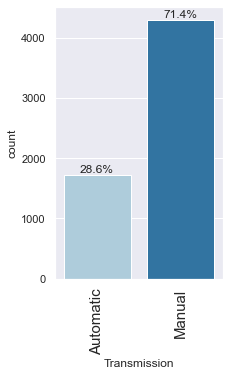

<IPython.core.display.Javascript object>

In [62]:
labeled_barplot(df, "Transmission", perc=True)

#### Observations.
1. 71.4% of the cars make use of manual transmission.

## Owner_Type

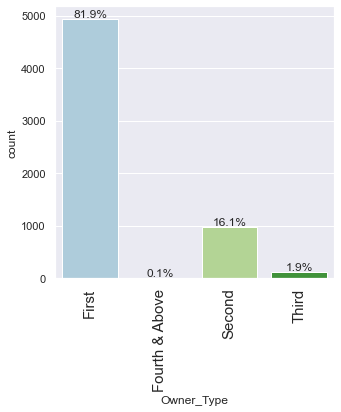

<IPython.core.display.Javascript object>

In [63]:
labeled_barplot(df, "Owner_Type", perc=True)

#### Observations.
1. Most of the cars are **First** owned.

#  Bivariate Analysis.

Through bivariate analysis we try to analyze two variables simultaneously. I will try to determine if there is any relationship between two variables from the dataset.

For this type of analysis, we can use use:
1. Pairplot.
2. Heatmap function in seaborn.
3. Pointplot.
3. Barplot or
4. Scatter plot.

Exploring the Relationship between numerical variables using **pair plots** and **correlation plots**.

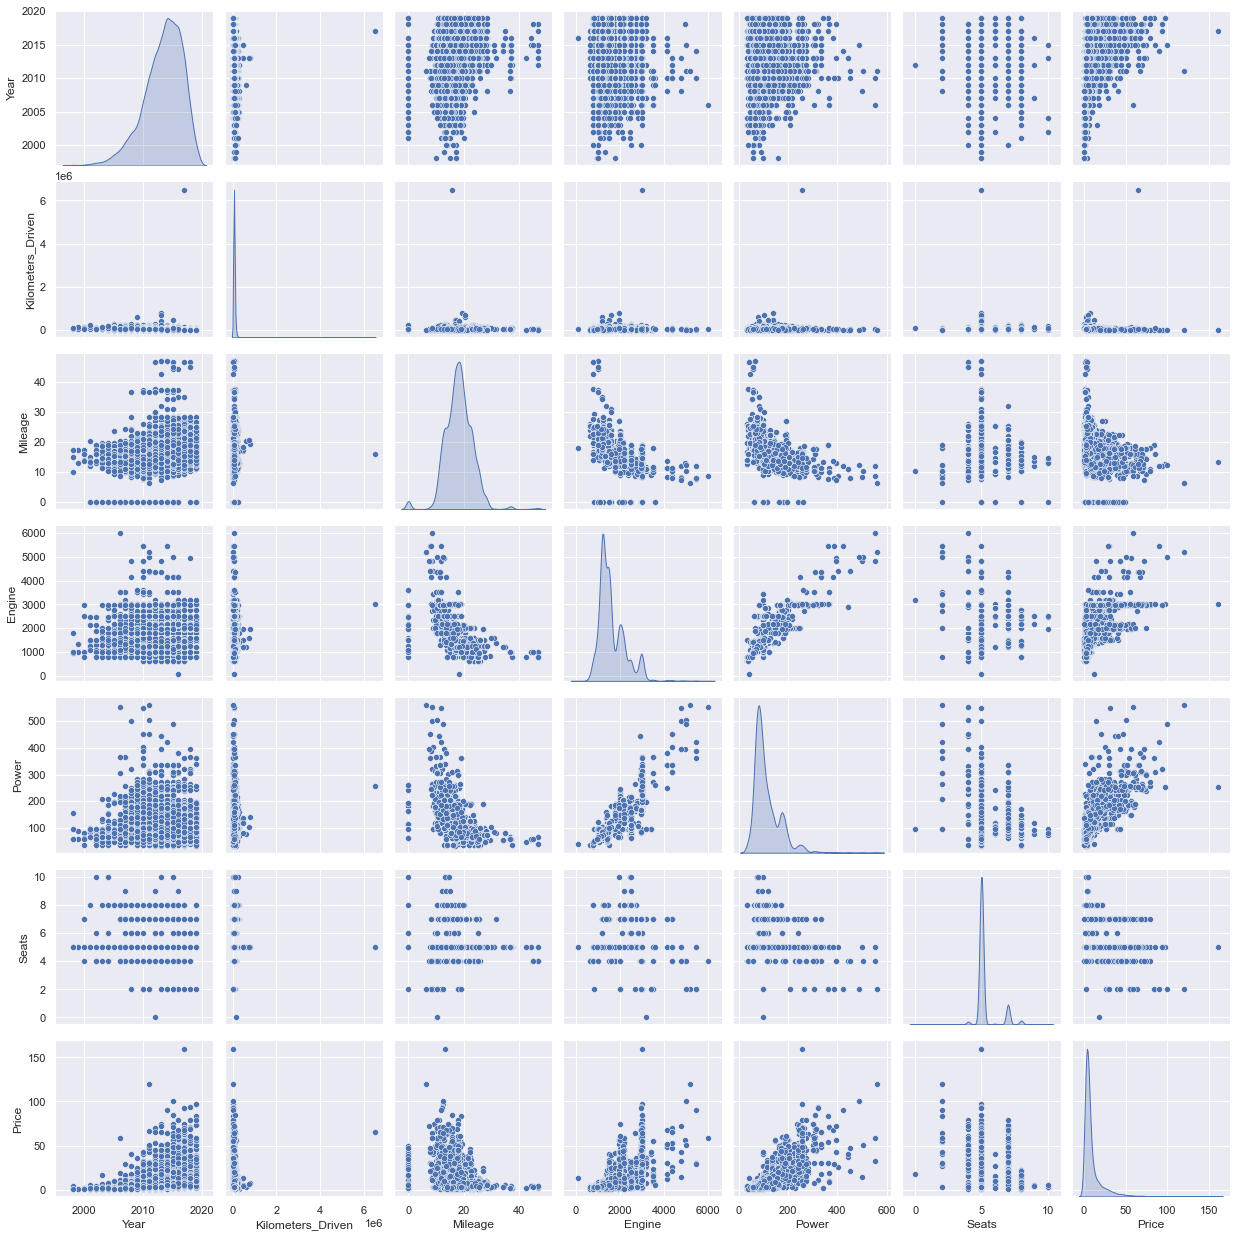

<IPython.core.display.Javascript object>

In [64]:
# using a pairplot to shown the relationship between numerical variables.
sns.pairplot(df, diag_kind="kde")

In [65]:
correlation = df.corr()  # creating a 2-D Matrix with correlation plots
correlation

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.173048,0.303756,-0.050086,0.024195,0.015204,0.305327
Kilometers_Driven,-0.173048,1.000000,-0.061866,0.090890,0.032080,0.082782,-0.011493
Mileage,0.303756,-0.061866,1.000000,-0.571629,-0.488208,-0.289743,-0.300068
Engine,-0.050086,0.090890,-0.571629,1.000000,0.860410,0.393368,0.657347
Power,0.024195,0.032080,-0.488208,0.860410,1.000000,0.102470,0.769711
Seats,0.015204,0.082782,-0.289743,0.393368,0.102470,1.000000,0.052811
Price,0.305327,-0.011493,-0.300068,0.657347,0.769711,0.052811,1.000000


<IPython.core.display.Javascript object>

## plotting a Heatmap

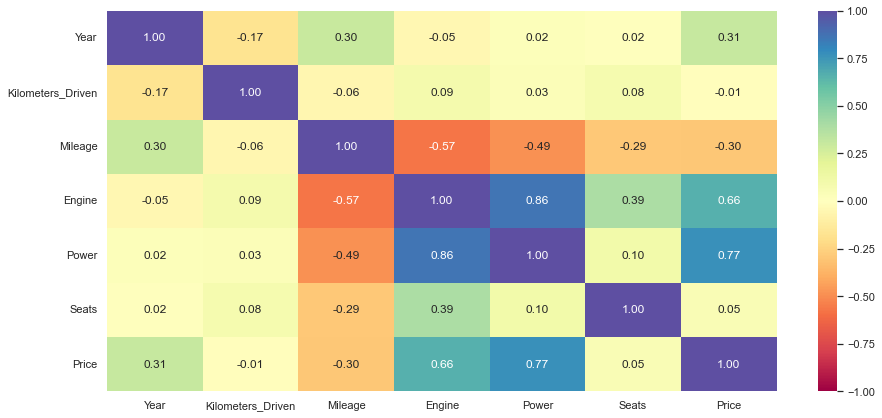

<IPython.core.display.Javascript object>

In [66]:
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations.
1. The displacement volume of the **Engine** and the **Power** of the engine are highly correlated. 0.86 correlation.
2. The displacement volume of the **Engine**  has a slightly high correlation with the **Price** of the old car. 0.66 is the correlation.
3. The Maximum **Power** of the car  has a slightly high(Positive) correlation with the **Price** of the old car. 0.77 is the correlation.
4. Further investigation would be needed on this Dataset.


### Exploring the categorical features
[Fuel_Type], [Transmission], and [Owner_Type].

I will check the relationship betwwen the **Target** variable with some of the **categorical** columns in my data

### Price vs Fuel-Type

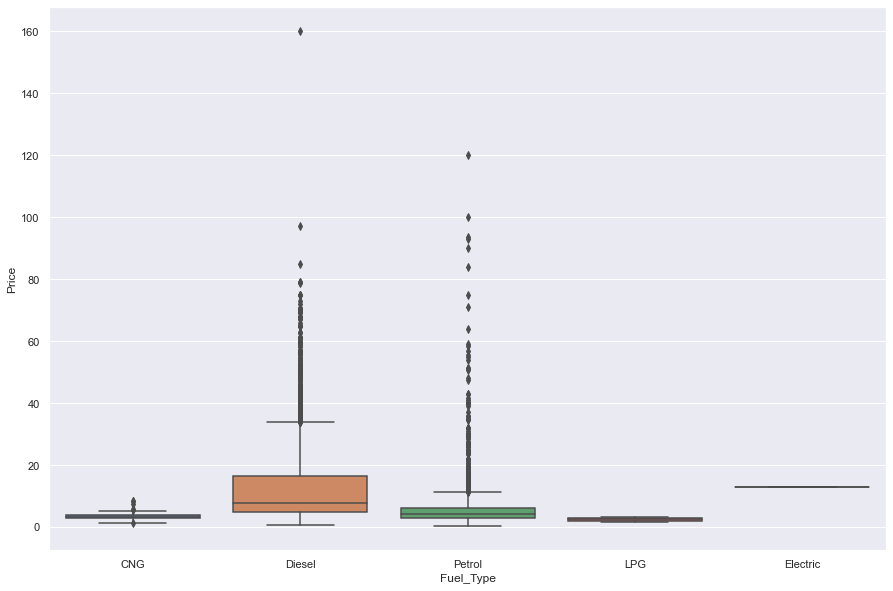

<IPython.core.display.Javascript object>

In [67]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="Fuel_Type", y="Price", data=df)
plt.show()

#### Observations
1. Old cars that make use of Electric **[Fuel_Type]** are more expensive.
2. Old cars that make use of CNG or LPG **[Fuel_Type]** are the cheapest.



## Alternatively,
I will use barplots below, to show the relationship between **[Price]** all the **[Fuel_Type]**.

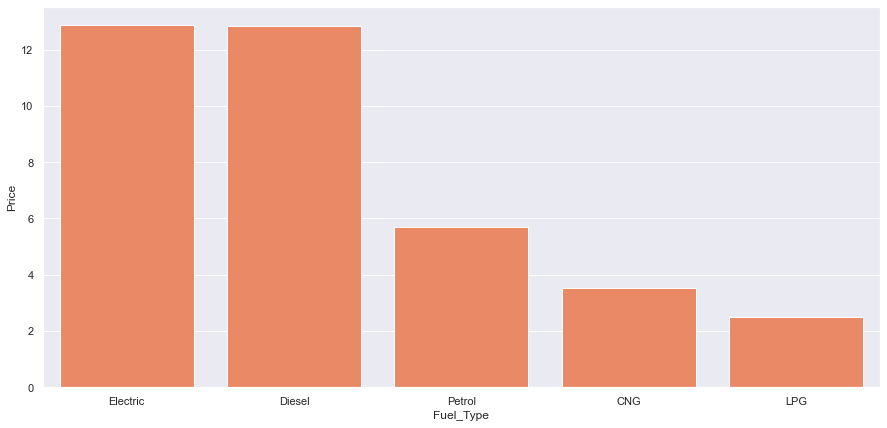

<IPython.core.display.Javascript object>

In [68]:
plt.figure(figsize=(15, 7))  # To resize the plot
sns.barplot(
    data=df,
    x="Fuel_Type",
    y="Price",
    ci=None,
    color="coral",
    order=df.groupby("Fuel_Type").Price.mean().sort_values(ascending=False).index,
)
plt.show()

#### Observations
1. Old cars that make use of Electric and Diesel [Fuel_Type] are more expensive.
2. Old cars that make use of CNG or LPG [Fuel_Type] are the cheapest.

### Price vs Transmission

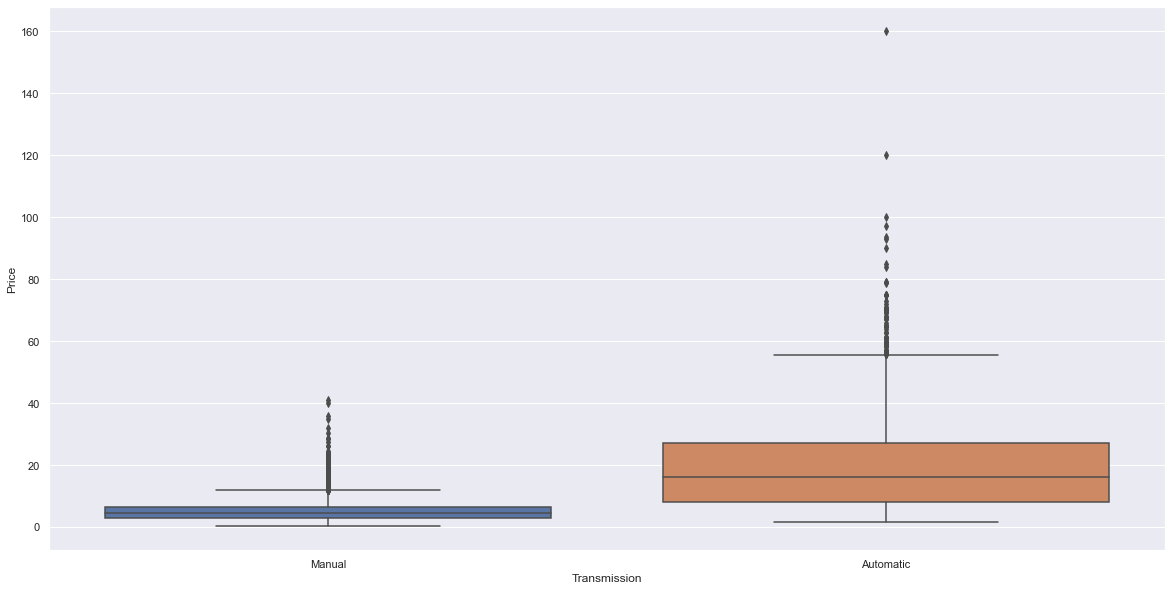

<IPython.core.display.Javascript object>

In [69]:
plt.figure(figsize=(20, 10))
sns.boxplot(x="Transmission", y="Price", data=df)
plt.show()

#### Observation.
1. Old Cars with Automatic Transmission are more expensive than Old Cars a Manual Transmission.

## Alternatively,
I will use barplots below, to show the relationship between **[Price]** all the **[Transmission]**.

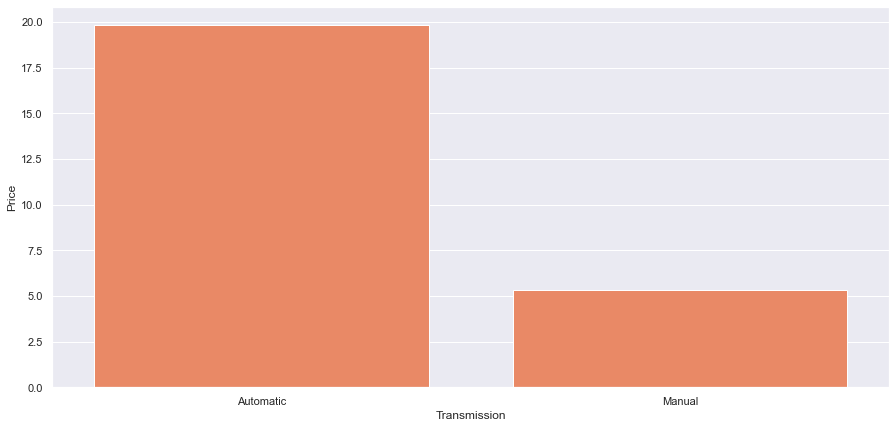

<IPython.core.display.Javascript object>

In [70]:
plt.figure(figsize=(15, 7))  # To resize the plot
sns.barplot(
    data=df,
    x="Transmission",
    y="Price",
    ci=None,
    color="coral",
    order=df.groupby("Transmission").Price.mean().sort_values(ascending=False).index,
)
plt.show()

#### Observation.
1. Old Cars with Automatic Transmission are more expensive than Old Cars a Manual Transmission.

### Price vs Owner-Type

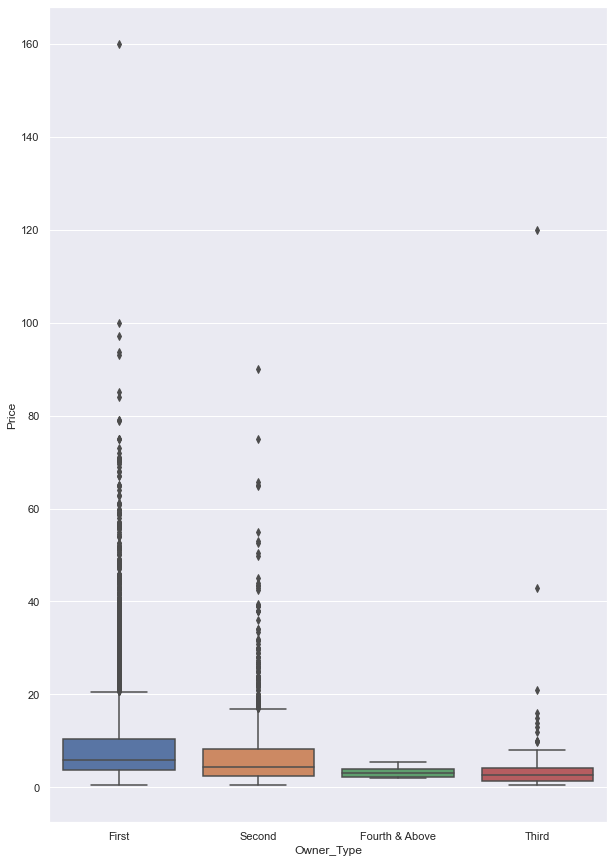

<IPython.core.display.Javascript object>

In [71]:
plt.figure(figsize=(10, 15))
sns.boxplot(x="Owner_Type", y="Price", data=df)
plt.show()

#### Observation.
1. As the **[Owner_Type]** changes from **First** to **Fourth and Above**, the **[Price]** of the Old Car drops.
2. **[First]** **[Owner_Type]** cars are more expensive.

## Alternatively,
I will use barplots below, to show the relationship between **[Price]** all the **[Owner_Type]**.

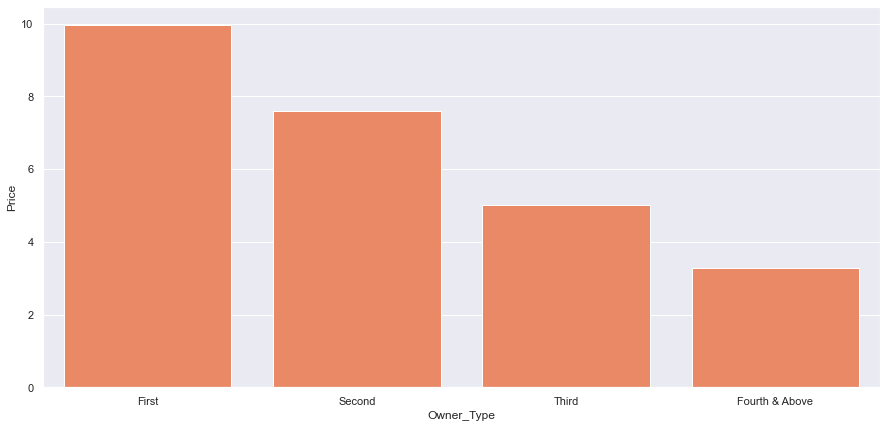

<IPython.core.display.Javascript object>

In [72]:
plt.figure(figsize=(15, 7))  # To resize the plot
sns.barplot(
    data=df,
    x="Owner_Type",
    y="Price",
    ci=None,
    color="coral",
    order=df.groupby("Owner_Type").Price.mean().sort_values(ascending=False).index,
)
plt.show()

#### Observation.
1. As the **[Owner_Type]** changes from **First** to **Fourth and Above**, the **[Price]** of the Old Car drops.
2. **[First]** **[Owner_Type]** cars are more expensive.

# STEP C-Data Preprocessing ***continues*** here- FEATURE ENGINEERING

#### Transformation of Variables

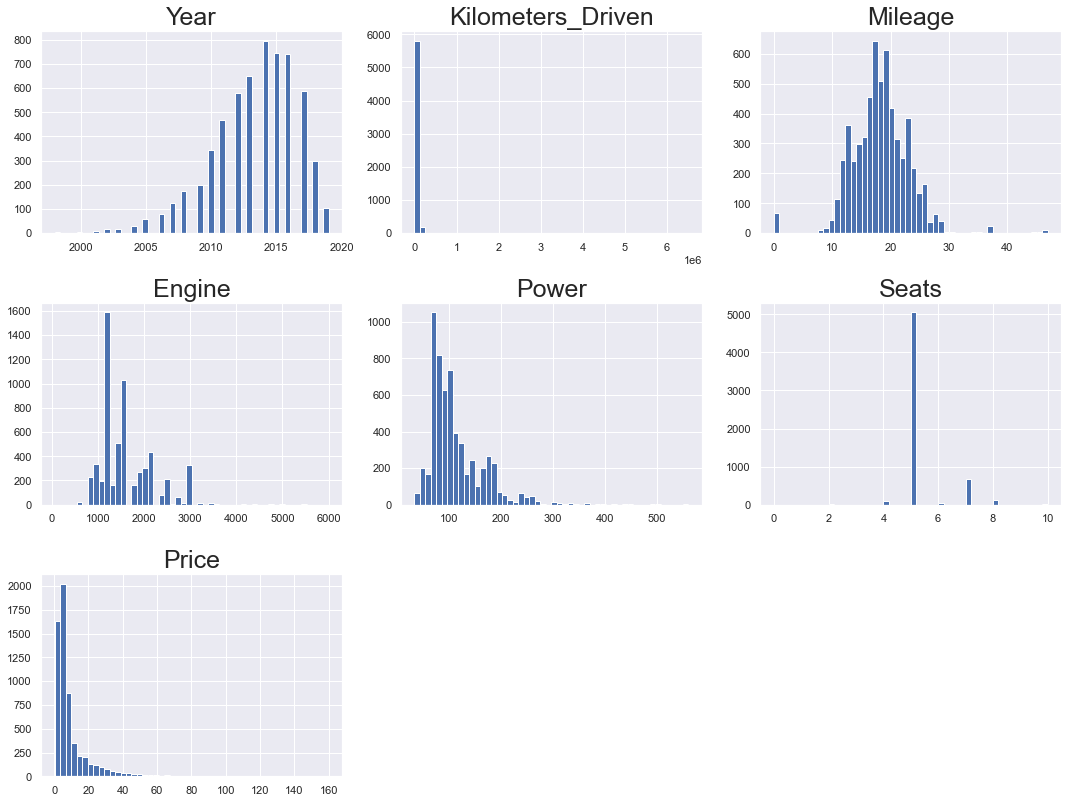

<IPython.core.display.Javascript object>

In [73]:
# list of numerical columns
dist_cols = [
    item for item in df.select_dtypes(include=np.number).columns if "tag" not in item
]

#  plotting a histogram of all Numerical columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df[dist_cols[i]], bins=50)
    # sns.histplot(data=df3, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

#### Observations.
1. Most of these features are skewed to the right or left.
2. Some are close to normal distribution.
3. I will apply Log Tranformation to the following **[columns]** or **[Features]**
- Year.
- Kilometer_Driven.
- Engine.
- Power.
- Seats.
- Price.

4. The Mileage column is close to  a normal distribution. So, i won't transform this feature.
5. I will drop the following columns:

- **[Mileage]**.

### Creating a copy of the dataframe.

In [74]:
df1 = df.copy()

# also dropping the **[Mileage]** column because it is almost normally distributed
dist_cols.remove("Mileage")

# The heatmap shows that there is no reasonable correlation between Year and (Price, Engine, Power).
dist_cols.remove("Year")

# Dropping the target variable
dist_cols.remove("Price")


df1.drop(["Name"], axis=1, inplace=True)
df1

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


<IPython.core.display.Javascript object>

### Log transformation

Some of features are very skewed and will likely behave better after Log Transformation.

I'll transform:


1. Kilometer_Driven.
2. Engine.
3. Power.
4. Seats.
5. Price

## Log Transformed Columns

In [75]:
for col in dist_cols:
    df1[col + "_log"] = np.log(df1[col] + 1)

# dropping the original columns
df1.drop(dist_cols, axis=1, inplace=True)
df1.head()

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Price,Kilometers_Driven_log,Engine_log,Power_log,Seats_log
0,Mumbai,2010,CNG,Manual,First,37.24,1.75,11.184435,6.906755,4.080246,1.791759
1,Pune,2015,Diesel,Manual,First,19.67,12.50,10.621352,7.367077,4.845761,1.791759
2,Chennai,2011,Petrol,Manual,First,18.20,4.50,10.736418,7.090077,4.496471,1.791759
3,Chennai,2012,Diesel,Manual,First,20.77,6.00,11.373675,7.130099,4.497139,2.079442
4,Coimbatore,2013,Diesel,Automatic,Second,15.20,17.74,10.613271,7.585281,4.954418,1.791759


<IPython.core.display.Javascript object>

## Plotting the Transformed data

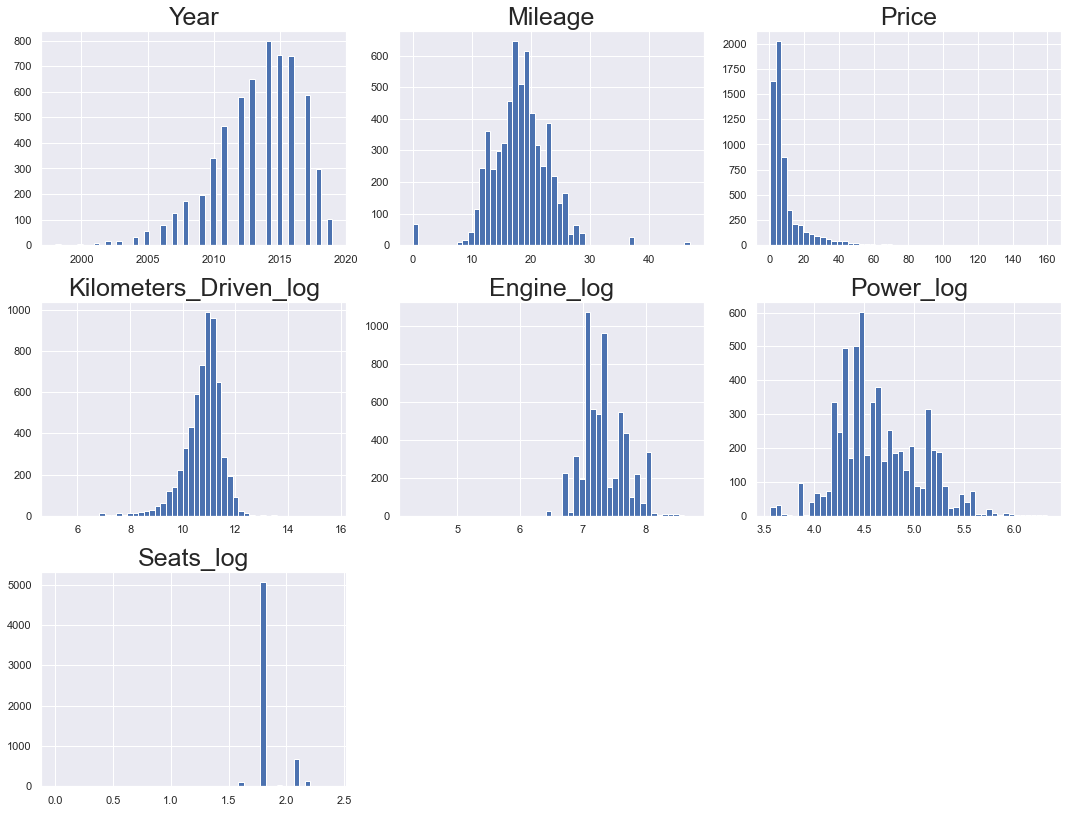

<IPython.core.display.Javascript object>

In [76]:
dist_cols = [
    item for item in df1.select_dtypes(include=np.number).columns if "tag" not in item
]

# let's plot histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df1[dist_cols[i]], bins=50)
    # sns.histplot(data=df, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

#### Observations.
1. The columns have been Transformed.
2. The Heavy skewness in some of the columns has been reduced.
3. Few of the features are have become a nearly normal distribution

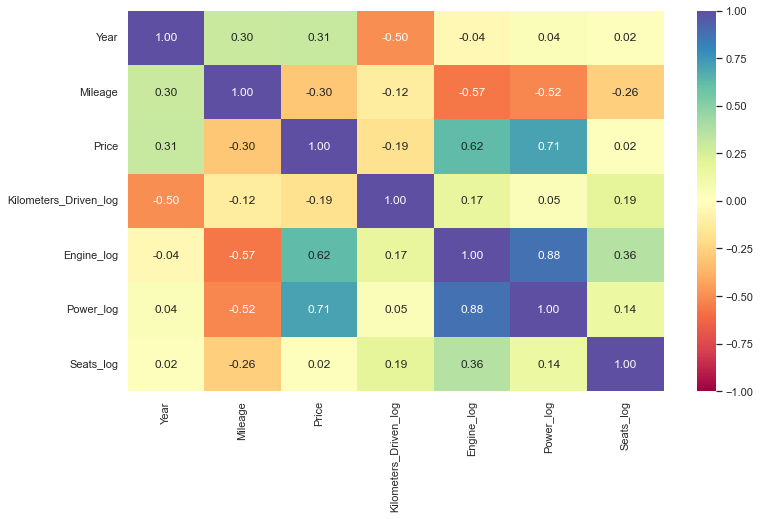

<IPython.core.display.Javascript object>

In [77]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df1[dist_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations.
1. The log of displacement volume of the **Engine_log** and the **Power_log** of the engine are highly correlated. 0.88 correlation.
2. The log of displacement volume of the **Engine_log**  has a slightly high correlation with the **Price_log** of the old car. 0.7 is the correlation.
3. The Maximum **Power_log** of the car  has a slightly high(Positive) correlation with the **Price_log** of the old car. 0.79 is the correlation.
4. There is an improvement in the correlation between these features.


### Converting categoricals into categorical types

In [78]:
cat_vars = ["Fuel_Type", "Transmission", "Owner_Type"]
# the other categorical variables have lots of levels
# and I wouldn't dummy encode them as such

for colname in cat_vars:
    df1[colname] = df1[colname].astype("category")

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               6019 non-null   object  
 1   Year                   6019 non-null   int64   
 2   Fuel_Type              6019 non-null   category
 3   Transmission           6019 non-null   category
 4   Owner_Type             6019 non-null   category
 5   Mileage                6019 non-null   float64 
 6   Price                  6019 non-null   float64 
 7   Kilometers_Driven_log  6019 non-null   float64 
 8   Engine_log             6019 non-null   float64 
 9   Power_log              6019 non-null   float64 
 10  Seats_log              6019 non-null   float64 
dtypes: category(3), float64(6), int64(1), object(1)
memory usage: 394.5+ KB


<IPython.core.display.Javascript object>

# Model building - Linear Regression

In [79]:
# independent variables X
X = df1.drop(["Price"], axis=1)

# Dependent Variables y
y = df1["Price"]

<IPython.core.display.Javascript object>

### Creating dummy variables

In [80]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,Year,Mileage,Kilometers_Driven_log,Engine_log,Power_log,Seats_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,37.24,11.184435,6.906755,4.080246,1.791759,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,2015,19.67,10.621352,7.367077,4.845761,1.791759,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,2011,18.20,10.736418,7.090077,4.496471,1.791759,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,2012,20.77,11.373675,7.130099,4.497139,2.079442,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,2013,15.20,10.613271,7.585281,4.954418,1.791759,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

### Split the dataset into train and test data

In [81]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [82]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4213
Number of rows in test data = 1806


<IPython.core.display.Javascript object>

### Fitting a linear model

In [83]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

### Display of model coefficients with column names

In [84]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,0.712124
Mileage,-0.237543
Kilometers_Driven_log,-2.642266
Engine_log,4.398127
Power_log,11.474407
Seats_log,-10.980639
Location_Bangalore,2.463767
Location_Chennai,1.174746
Location_Coimbatore,3.136091
Location_Delhi,0.262575


<IPython.core.display.Javascript object>

#### Interpretation of coefficients.
1. The Coefficients of [Engine_log], [Power_log], some of the [Location] column, [Fuel_Type], and [Owner_Type] are positive. It simply means that an increase in these will lead to an increase in the Price of the Old Car.

2. 1. The Coefficients of [Mileage], [Kilometer_Driven], [Seats_log], some of the [Location] column, [Fuel_Type], and [Owner_Type] are negative. It simply means that a decrease in these will lead to a decrease in the Price of the Old Car.


# Model performance evaluation

I will evaluate the model on different performance metrics such as:

1. The metric functions defined in sklearn for RMSE, MAE, and  𝑅2 .

2. Calculate adjusted  𝑅2  and MAPE.

The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.


In [85]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

### Checking model performance on train set

In [86]:
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.832725,4.207526,0.634886,0.632793,87.461864


<IPython.core.display.Javascript object>

### Checking model performance on test set

In [87]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.106667,4.029218,0.685979,0.681747,82.02006


<IPython.core.display.Javascript object>

#### Observations

1. The $R^2$ of the Training data is and 0.635. This model explains 63.5% of the total variation in the training data.
2. The $R^2$ of the Test data is and 0.686. This model explains 68.6% of the total variation in the test data
3. These scores are close to each other.

4. RMSE values on the train and test sets are 6.833 and 6.107 respectively. These values are comparable.

5. Hence, the model is not overfitting.

6. MAE indicates that our current model is able to predict anime ratings within a mean error of 4.03 on the test set.

7. The MAPE of 82.02 on the test data means that we are able to predict within 82% of the Price of the old car.

8. The overall performance is much better than the model we built in the previous session.

# Actionable Insights & Recommendations

1. I built a predictive model that can be used to predict the Price of an Old Car with an $R^2$ of 0.635 on the training set.


2.  Cars4U can use this model to predict the Price of an Old Car with a mean error of 4.03 on the test set.


3.  We found that **[Mileage]**, **[Kilometer_Driven]**, **[Seats_log]** are some of the factors which tend to decrease the Price of an Old car.


4. The Coefficients of **[Engine_log]**, **[Power_log]**, some of the **[Location]** column, **[Fuel_Type]**, and **[Owner_Type]** are positive. It simply means that an increase in these will lead to an increase in the **Price** of the Old Car.


5. I found out that as the displacement volume of the engine in CC increases, the Price of the old car tends to increase.  

6. I found out that the location of the old car tends to affect the **[Price]** of the car.


7. We improved our linear regression model performance by applying non-linear transformations to some of the attributes.

8. The **[Fuel_Type]** also affects or determines the Price of the Old Car. Old cars that uses Electrical and Diesel **[Fuel-Type]** are more expensive than a car that uses CNG, Petrol or LPG.

9. As the **[Owner_Type]** changes from First to Fourth and Above, the [Price] of the Old Car drops.

 

# CONCLUSION 
    
Therefore, inorder to make more profits, company Cars4U should 
1. Consider the location of the old car.
2. The [Fuel_Type].  Electrical and Diesel cars are more expensive.
3. The [Owner_Type]. The [Price] of the Old Car drops as ownership changes from First to Fourth.
4. The Transmission type. The automatic cars are more expensive
5. The Mileage of the car. As the Mileage of a car increases, the price reduces.